# Diffusion Model in a 2D Box & Potential Map
- both simulated Diffusion Model & Potential Map

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.animation import FuncAnimation

## Initializations!

In [10]:
# initialize parameters
Lx, Ly = 2, 3
Nx, Ny = 8, 12
dx, dy = Lx / Nx, Ly / Ny
N = 15
D, dt = 5.13e-6, 1000
pmove = (D * 3 * dt) / dx ** 2  # movement probability

# initialize grid and ions
grid = np.zeros((Nx, Ny), dtype=int)
ion_x = np.mod(np.random.normal(0.3 * Lx, 0.5, N), Lx)
ion_y = np.mod(np.random.normal(0.3 * Ly, 0.5, N), Ly)
ion_i = np.ceil(ion_x / dx).astype(int)
ion_j = np.ceil(ion_y / dy).astype(int)

for i in range(N):
    grid[ion_i[i] % Nx, ion_j[i] % Ny] += 1

## Helper Functions

In [11]:
# randomly select one of up, down, left, right neighbors (used in algorithm)
def select_random_neighbor(x, y):
    neighbors = [
        ((x - 1) % Nx, y),
        ((x + 1) % Nx, y),
        (x, (y - 1) % Ny),
        (x, (y + 1) % Ny)
    ]
    return random.choice(neighbors)

In [12]:
# single neighborhood attempt algorithm
def diffuse(grid, ion_positions, pmove):
    new_grid = np.copy(grid)
    new_ion_positions = np.copy(ion_positions)

    for i in range(N):
        x, y = ion_positions[i]  # create variable, instead of 2 for loops for x, y
        if grid[x, y] != 0:  # if cell not empty
            nbr_x, nbr_y = select_random_neighbor(x, y)  # select random neighbor
            if grid[nbr_x, nbr_y] == 0:  # if neighbor is empty
                if pmove > random.random():  # if Pmove > RND
                    new_grid[nbr_x, nbr_y] += 1  # move ion to neighboring cell
                    new_grid[x, y] -= 1
                    new_ion_positions[i] = (nbr_x, nbr_y)

    return new_grid, new_ion_positions

In [13]:
# function that checks if ions have really diffused everywhere (uniform distribution)
# (this is just one method: grid coverage)
    # other ideas: spatial analysis scipy package, run many iterations & see when diffusion stabilizes
# makes sure that sd of num of ions per cell >= set threshold
def has_diffused_uniformly(grid, threshold=1.96):  #
    ion_counts = grid.flatten()
    mean = np.mean(ion_counts)
    std_dev = np.std(ion_counts)
    print(std_dev / mean)
    return std_dev / mean < threshold

# find lowest standard deviation possible (or after a few iterations) and terminate program

In [14]:
# initialize plotting area
# create subplots for ion positions and potential map
# set up the initial conditions for the plots, including creating a color bar for the heatmap
def setup_plot():
    global fig, ax, potential_ax
    fig, (ax, potential_ax) = plt.subplots(1, 2, figsize=(15, 6))  # create figure and subplots

    initial_potential_map = np.zeros((Nx, Ny))  # initialize potential map with zeros
    heatmap = sns.heatmap(initial_potential_map, ax=potential_ax, cmap='viridis', cbar=True, vmin=0, vmax=np.max(grid))
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('Potential')  # create a heatmap with a color bar

    # potential_ax.clear()  # clear potential axis to prepare it for dynamic updates
    sns.heatmap(np.zeros((Nx, Ny)), ax=potential_ax, cmap='viridis', cbar=False, vmin=0, vmax=np.max(grid))

In [15]:
# update ion positions and grid for a given number of steps
# redraw plots to reflect the updated state
# visuals
# check for uniform diffusion and terminate the animation if the condition is met
def animate(t):
    global grid, ion_positions
    steps_per_frame = 1  # num of diffusion steps per animation frame
    for _ in range(steps_per_frame):
        grid, ion_positions = diffuse(grid, ion_positions, pmove)  # update grid and ion positions
        print(_, "time step")
        print(grid)
        print()

    ax.clear()  # clear previous plot
    ax.set_xlim(0, Ny)
    ax.set_ylim(0, Nx)
    ax.set_title(f'Diffusion in a 2D Box - Time Step {t * steps_per_frame}')
    ax.set_xlabel('Ny')
    ax.set_ylabel('Nx')

    sns.scatterplot(x=ion_positions[:, 1], y=ion_positions[:, 0], ax=ax)  # plot ion positions

    potential_map = grid.astype(float)  # compute & plot potential map as heatmap
    heatmap = sns.heatmap(potential_map, ax=potential_ax, cmap='viridis', cbar=False, vmin=0, vmax=np.max(grid))

    potential_ax.set_xlabel('Ny')
    potential_ax.set_ylabel('Nx')
    potential_ax.set_title('Potential Map')  # labels for potential map

    if has_diffused_uniformly(grid):  # check if ions fully diffused
        ani.event_source.stop()  # stop animation if true

## Run Simulation & Animate Both Graphs

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


0 time step
[[0 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 2 2 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

2.665833203084294
0 time step
[[1 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 2 1 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

2.5006665778014736
0 time step
[[1 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

2.32379000772445
0 time step
[[1 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

2.32379000772445
0 time st

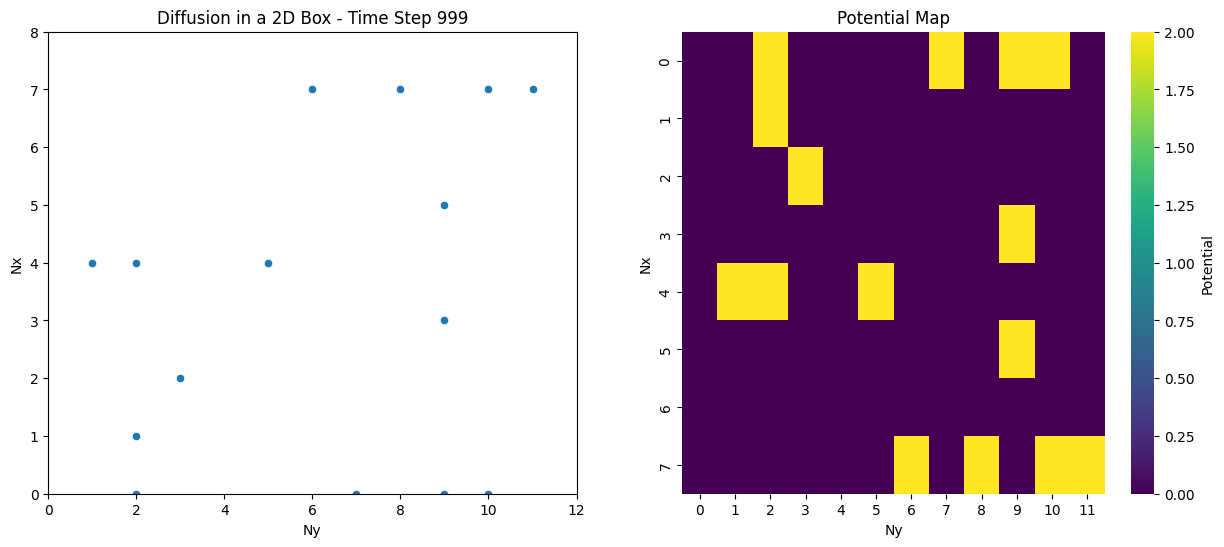

In [16]:
ion_positions = np.column_stack((ion_i % Nx, ion_j % Ny))
setup_plot()
ani = FuncAnimation(fig, animate, frames=1000, interval=50, repeat=False)

ani.save("newdiffpotent2D.mp4", writer="ffmpeg", fps=20)  # save animation as mp4 file

plt.show()

save animation later?